<a href="https://colab.research.google.com/github/arofenitra/stochastic-methods-of-AI-and-Modelling/blob/main/Law_of_Large_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Convergence
### Convergence in probability
A sequence of random varianle $X_1,...$ converge in *probability* in a random variable $X$ ( denoted as $\displaystyle X_n \xrightarrow{p} X$ or $p\displaystyle \lim_{n→∞}X_n=X $ if $$∀ϵ>0: \lim_{n→ ∞}P\left(|X_n-X|>ϵ\right)=0 $$
### Convergence in distribution
A sequence of random varianle $X_1,...$ with cumulative distribution functions $F_1,...$ converge in *distribution* in a random variable $X$ with cdf $F$ if $\displaystyle \lim_{n→∞}F_n(x)=F(x) \; ∀x\in \mathbb{R}$ .
### Almost sure convergence
The sequence $X_n$ converges almost surely or almost everywhere or with probability $1$ or strongly towards $X$ means that : $\displaystyle P(\lim_{n→∞}X_n=X)=1$


**Examples-Properties**:   
- The PDF $f_n=(1+\cos(2πnx))χ_{(0,1)}$ of the distribution $X_n$ converge to uniform (0,1) i.e. $X_n \xrightarrow{d}U_{(0,1)}$ but $f_n$ does not converge at all.
- $X$ is a standard normal random variables, then for the sequence $Y_n=(-1)^nX$, $Y_n \xrightarrow{d}X $ as $P(Y_{2n}\leq x)=P(X\leq x)\; , P(Y_{2n+1}\leq x)=P(X\geq -x)=P(X\leq x)$. But $P(|Y_n-X|\geq ϵ)=P(|X||1-(-1)^n|\geq ϵ)>0$ for $n$ even.
- Convergence in Probability implies convergence in distribution . Suppose that $X_1,...$ converge to $X$ in probability, i.e. $\displaystyle ∀ϵ>0: \lim_{n→ ∞}P\left(|X_n-X|>ϵ\right)=0$.  Let $a\in \mathbb{R}$
$$\{X_n\leq a \}⊆\{X\leq a+ϵ \}∪\{|X_n-X|\geq ϵ \} ⇒ P(\{X_n\leq a \})\leq P(\{X\leq a+ϵ \})+P(\{|X_n-X|\geq ϵ \})
$$
$$\{X\leq a-ϵ \}⊆\{X_n \leq a \}∪\{|X_n-X|\geq ϵ \} ⇒ P(\{X\leq a-ϵ \})\leq P(\{X_n\leq a \})+P(\{|X_n-X|\geq ϵ \})
$$
$${\displaystyle \operatorname {P} (X\leq a-\varepsilon )-\operatorname {P} \left(\left|X_{n}-X\right|>\varepsilon \right)\leq \operatorname {P} (X_{n}\leq a)\leq \operatorname {P} (X\leq a+\varepsilon )+\operatorname {P} \left(\left|X_{n}-X\right|>\varepsilon \right).}$$
$$P(X\leq a-\epsilon)-\lim_{n →∞}P(\{|X_n-X|\geq ϵ \})\leq \lim_{n →∞}P(X_n\leq a)\leq P(X\leq a-\epsilon)+\lim_{n →∞}P(\{|X_n-X|\geq ϵ \})$$
$$F(a-ϵ)\leq \lim_{n →∞}F_n(a)\leq F(a+ϵ) \; ∀ϵ>0 ⇒ \lim_{n →∞}F_n(a)=F(a)$$


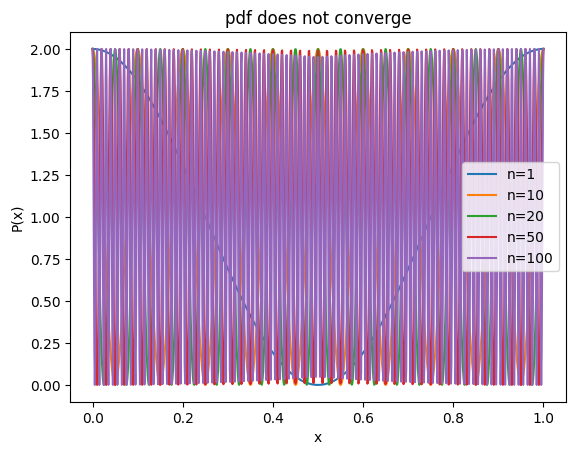

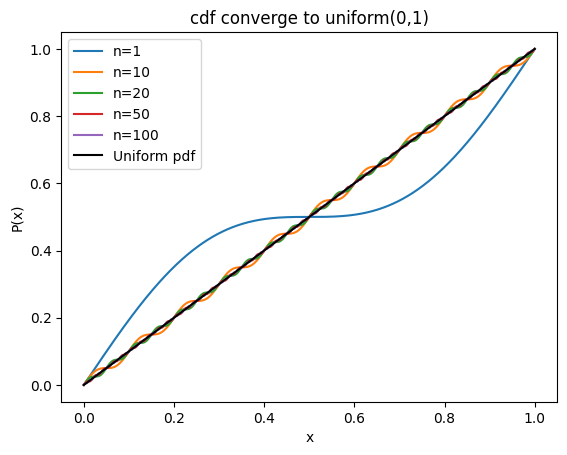

In [16]:
def pdf_f(n,x):
  return 1+np.cos(2*np.pi*n*x)

X=np.linspace(0,1,1000)
n_values=[1,10,20,50,100]
for n in n_values:
  plt.plot(X,pdf_f(n,X),label="n="+str(n))
plt.legend()
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("pdf does not converge")
plt.show()
def cdf_f(n,x):
  return x+np.sin(2*np.pi*n*x)/(2*np.pi*n)
X=np.linspace(0,1,1000)
n_values=[1,10,20,50,100]
for n in n_values:
  plt.plot(X,cdf_f(n,X),label="n="+str(n))
plt.plot(X,X,color="black",label="Uniform pdf")
plt.legend()
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("cdf converge to uniform(0,1)")
plt.show()

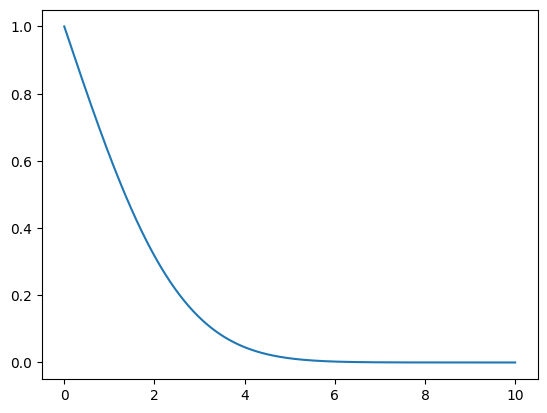

In [5]:
def probability(epsilon): # P(|X-Y_n|>epsilon)=P(X>epsilon/2)+P(X<-epsilon/2)
  return 1-sp.stats.norm.cdf(epsilon/2)+sp.stats.norm.cdf(-epsilon/2)

x=np.linspace(0,10,1000)
plt.plot(x,probability(x))

## Law of Large numbers and central limit theorem
Let $X_i$ be a sequence of independant identicaly distributed random variable with mean $\mathbb{E}[X_i]=μ \; ∀i$ and suppose $X=\frac{1}{n}(X_1+...X_n)$,  then
### Weak Law of Large numbers :
$$\bar{X_n}\xrightarrow{p}μ$$
### Strong law of Large numbers:
$$P(\lim_{n→∞}\bar{X_n}=μ)=1$$